In [114]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import statistics
import seaborn as sns; sns.set(style="whitegrid")

%matplotlib inline

In [144]:
df = pd.read_csv('datasets/data_cart.csv', index_col=0)#[['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3']]
pos = df.shape[0]-160
#del df['Data']
y_symbol = 'CMIG4'
x_symbol = 'ENBR3'

S1 = df[x_symbol][pos:]
S2 = df[y_symbol][pos:]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


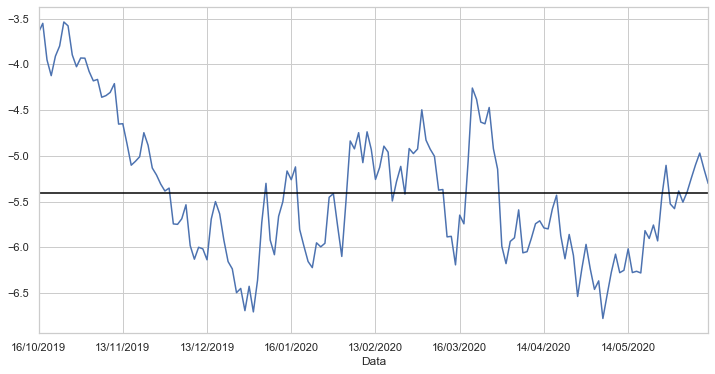

In [145]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[x_symbol]
b = results.params[x_symbol]

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')

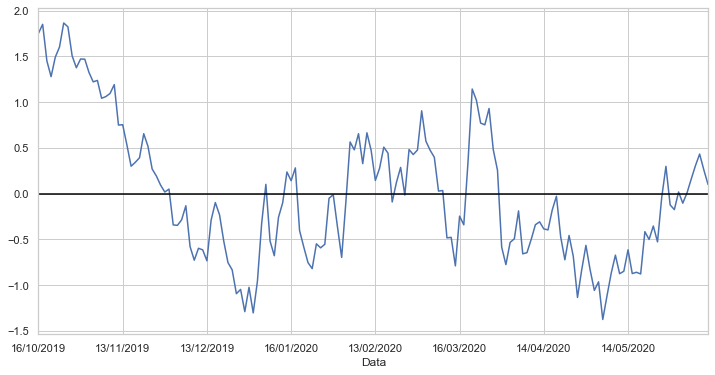

In [146]:
results.resid.plot(figsize=(12,6))
plt.axhline(results.resid.mean(), color='black')

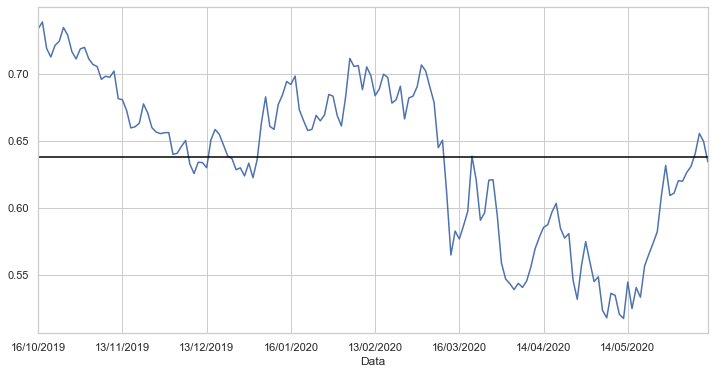

In [157]:
ratio = S2/S1
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')

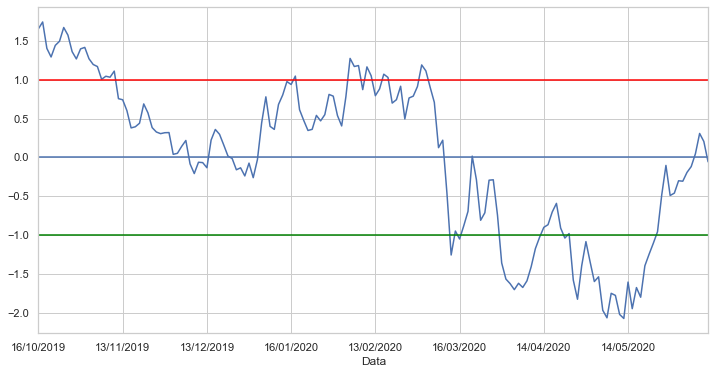

In [158]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

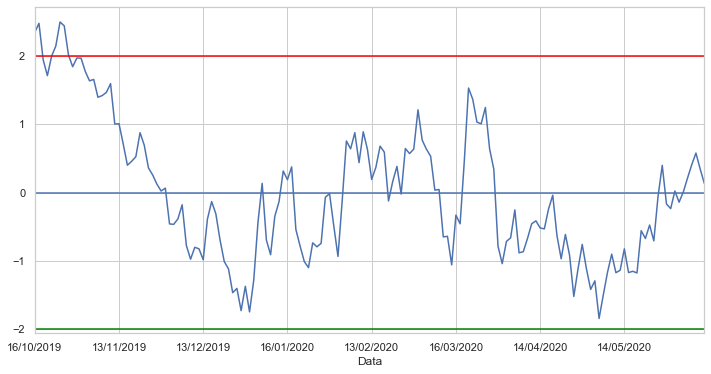

In [159]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

zscore(results.resid).plot(figsize=(12,6))
plt.axhline(zscore(results.resid).mean())
plt.axhline(2.0, color='red')
plt.axhline(-2.0, color='green')
plt.show()

In [160]:
ratios = S2/S1
print(len(ratios) * .70 )

112.0


In [161]:
train = ratios
test = ratios

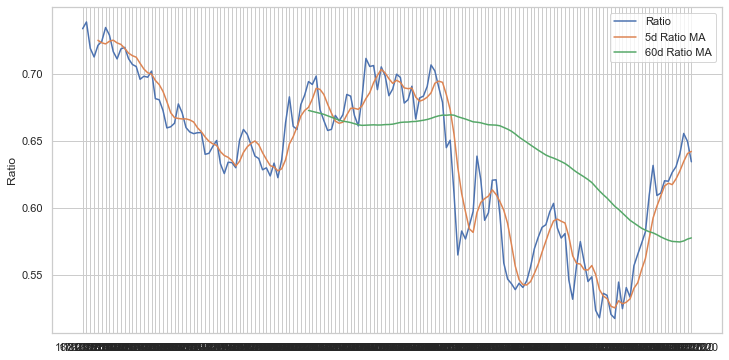

In [162]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

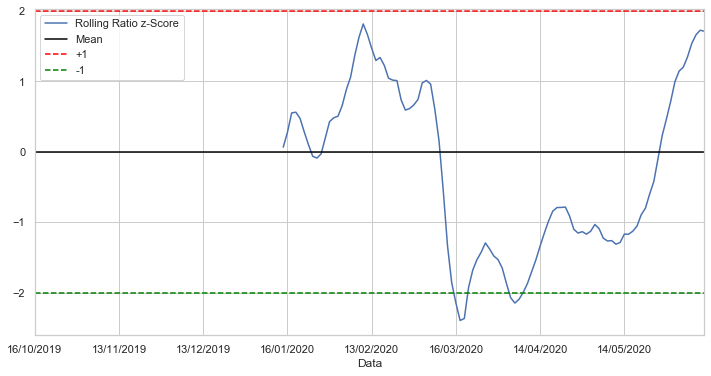

In [163]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

TypeError: no numeric data to plot

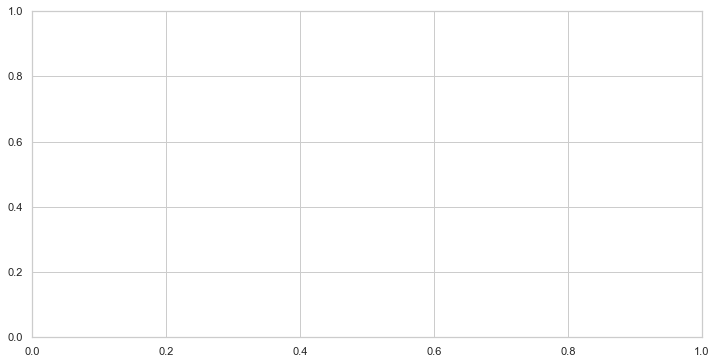

In [156]:
plt.figure(figsize=(12,6))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()